In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:
!pip install xgboost

# Dataset Reading

In [ ]:
df = pd.read_csv('/content/with_iterative_imputation_10y_70k.csv')
#dfu = pd.read_csv('/content/admission_data_cleaned.csv')

In [ ]:
df.head()

,INSTNM,PREDDEG,SATVR25,SATVR75,SATMT25,SATMT75,ACTCM25,ACTCM75,MD_EARN_WNE_P10,STUFACR,...,IRPS_BLACK,IRPS_HISP,IRPS_ASIAN,IRPS_AIAN,IRPS_NHPI,IRPS_2MOR,IRPS_NRA,IRPS_UNKN,PCTPELL,OPEFLAG
0,A & W Healthcare Educators,1,397.665656,535.148806,476.252449,540.114501,16.591484,19.442394,-6938.660529,43.141685,...,0.945512,0.103411,-0.010885,-0.085356,0.055472,0.015516,0.037022,0.028302,1.076398,1
1,A & W Healthcare Educators,1,347.709395,446.945613,440.948585,575.730552,12.500312,17.163747,12698.000011,40.848903,...,0.484544,0.219849,-0.076131,0.023384,0.057681,-0.057045,0.010235,-0.018083,0.832182,1
2,A & W Healthcare Educators,1,424.544283,555.681209,326.004565,483.605033,16.359178,16.995583,48480.251461,27.147178,...,-0.010494,0.254086,0.015056,-0.016872,-0.005224,-0.016031,0.033103,0.012295,1.071099,1
3,A & W Healthcare Educators,1,422.832843,474.730339,411.322874,512.820010,10.355115,26.453246,23241.595777,32.171928,...,0.126803,0.233572,0.128281,0.058964,0.018501,0.034038,-0.044650,0.115080,0.815411,1
4,A Better U Beauty Barber Academy,1,431.713687,560.490014,512.754993,562.949435,17.632360,27.212895,30872.890467,-13.733867,...,0.289251,0.397201,0.123936,-0.058068,0.033780,-0.029539,-0.001891,0.009951,0.445309,1


In [ ]:
#Check the number of rows and columns
rows, columns = df.shape
print('# of rows: {0} and # of columns: {1}'.format(rows,columns))

# of rows: 72238 and # of columns: 30


# Use University as the Label

In [ ]:
df = df.drop(columns=['INSTNM'])

X = df.drop('MD_EARN_WNE_P10', axis=1)  # Predictor variables
y = df['MD_EARN_WNE_P10']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

# num_classes = df['INSTNM'].nunique()
# print("Number of classes:", num_classes)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# encoder = LabelEncoder()
# encoder2 = LabelEncoder()

# # Fit the encoder to the target variable and transform it to integer labels
# encoded_y = encoder.fit_transform(dfu['univName'])

# dfu['ugCollege'] = encoder2.fit_transform(dfu['ugCollege'])

# # The number of classes can also be obtained from the encoder
# num_classes = len(encoder.classes_)
# print("Number of classes:", num_classes)
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.3, random_state=42)


In [ ]:
# X_train = pd.get_dummies(X_train, columns=['ugCollege'])
# X_test = pd.get_dummies(X_test, columns=['ugCollege'])


# 1. Implement XGBoost as one of the baseline, treat as a Regression Problem

## Without cluster the universities

In [ ]:
import xgboost as xgb

# Initialize the classifier
regressor = xgb.XGBRegressor(random_state=42)
#clf = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, enable_categorical=True)
# Fit the classifier to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [ ]:
# Make predictions with the test data
y_pred = regressor.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2)

MSE: 249917821.25
RMSE: 15808.79
MAE: 12497.13
R2: 0.29


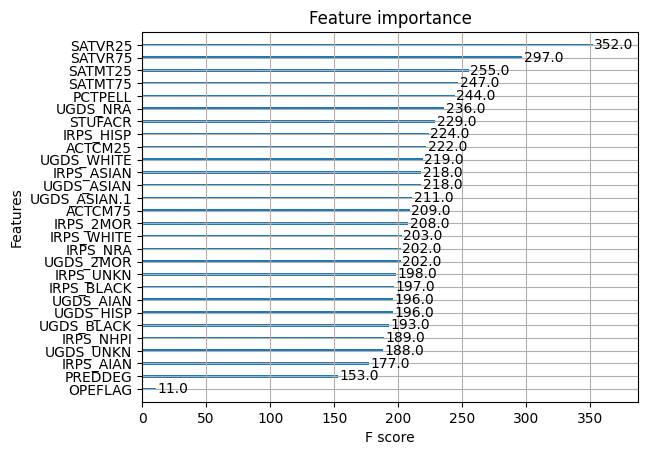

In [ ]:
xgb.plot_importance(regressor)
plt.show()

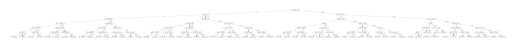

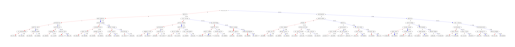

In [ ]:
# Plot the first tree
xgb.plot_tree(regressor, num_trees=0)
plt.show()

# Plot the second tree
xgb.plot_tree(regressor, num_trees=1)
plt.show()

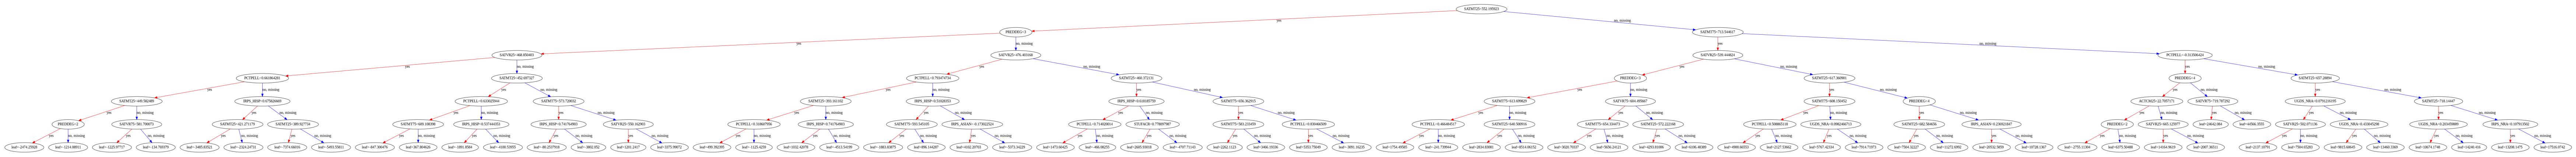

In [ ]:
fig, ax = plt.subplots(figsize=(90, 90))
xgb.plot_tree(regressor, num_trees=0, ax=ax, dpi=300)
plt.show()


# Simple MLP Model:
Follows https://github.com/chinmaysharmacs10/University_Recommender/blob/master/classifier_model.py

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

class Regressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Regressor, self).__init__()
        self.layer1 = nn.Linear(input_dim, 400)
        self.layer2 = nn.Linear(400, 100)
        #self.layer2 = nn.Linear(400, 800)
        #self.layer3 = nn.Linear(800, 100)
        self.layer4 = nn.Linear(100, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        #x = self.relu(self.layer3(x))
        x = self.layer4(x)  # No activation, softmax will be applied in the loss
        return x


X_train_pt = torch.tensor(X_train.values, dtype=torch.float)
Y_train_pt = torch.tensor(y_train.values, dtype=torch.float)
X_test_pt = torch.tensor(X_test.values, dtype=torch.float)
Y_test_pt = torch.tensor(y_test.values, dtype=torch.float)

In [ ]:
print(Y_train_pt.shape)

torch.Size([50566])


In [ ]:
# Initialize the model, loss, and optimizer
model = Regressor(X_train_pt.shape[1], 1) # output_dim = 1 for regression problem
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # DataLoader
# train_data = TensorDataset(X_train_pt, Y_train_pt.argmax(1))
# train_loader = DataLoader(dataset=train_data, batch_size=20, shuffle=True)

# # Training loop
# model.train()
for epoch in range(400):  # Number of epochs
    model.train()
    optimizer.zero_grad()  # Clear gradients
    outputs = model(X_train_pt)  # Forward pass
    loss = criterion(outputs, Y_train_pt)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update parameters

    if (epoch+1) % 50 == 0:  # Print loss every 50 epochs
        print(f'Epoch [{epoch+1}/200], Loss: {loss.item():.4f}')

        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # No gradient computation
            predictions = model(X_test_pt)
            r2 = r2_score(predictions, Y_test_pt)
            print("R2: %.2f" % r2)
        # Calculate other metrics as needed

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [50/200], Loss: 956315712.0000
R2: -497.60


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/200], Loss: 380501408.0000
R2: -22.00


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [150/200], Loss: 380283200.0000
R2: -22.37


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [200/200], Loss: 380220896.0000
R2: -22.46


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [250/200], Loss: 380146528.0000
R2: -22.59


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [300/200], Loss: 380055104.0000
R2: -22.77


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [350/200], Loss: 379934656.0000
R2: -23.01


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([50566])) that is different to the input size (torch.Size([50566, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [400/200], Loss: 379760960.0000
R2: -23.36


In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No gradient computation
    predictions = model(X_test_pt)
    mse = criterion(predictions, Y_test_pt)
    print(f'MSE: {mse.item()}')
    # Calculate other metrics as needed
    # Calculate the MSE
    mse = mean_squared_error(predictions, Y_test_pt)
    print("MSE: %.2f" % mse)

    # Calculate the RMSE
    rmse = np.sqrt(mse)
    print("RMSE: %.2f" % rmse)

    mae = mean_absolute_error(predictions, Y_test_pt)
    print("MAE: %.2f" % mae)

    r2 = r2_score(predictions, Y_test_pt)
    print("R2: %.2f" % r2)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([21672])) that is different to the input size (torch.Size([21672, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSE: 366571136.0
MSE: 302921536.00
RMSE: 17404.64
MAE: 13480.49
R2: -23.36


# Feature Token Transformer:

https://www.kaggle.com/code/masatakasuzuki/ft-transformer-transformer-for-tabular-data

In [ ]:
!pip install tabtransformertf
!pip install tensorflow-addons
from IPython.display import clear_output
clear_output()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tabtransformertf.utils.preprocessing import df_to_dataset, build_categorical_prep
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
df = pd.read_csv('with_iterative_imputation_10y_70k.csv')
df = df.drop(columns=['INSTNM'])


In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('MD_EARN_WNE_P10')
print(numerical_features)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)

Target_FEATURE = 'MD_EARN_WNE_P10'
print(Target_FEATURE)


['PREDDEG', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 'ACTCM75', 'STUFACR', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_ASIAN.1', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'IRPS_WHITE', 'IRPS_BLACK', 'IRPS_HISP', 'IRPS_ASIAN', 'IRPS_AIAN', 'IRPS_NHPI', 'IRPS_2MOR', 'IRPS_NRA', 'IRPS_UNKN', 'PCTPELL', 'OPEFLAG']
[]
MD_EARN_WNE_P10


In [ ]:
sc = StandardScaler()
sc.fit_transform(train_data[numerical_features])

train_data[numerical_features] = sc.transform(train_data[numerical_features])
test_data[numerical_features] = sc.transform(test_data[numerical_features])

In [ ]:
print(test_data.keys())

Index(['PREDDEG', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25',
       'ACTCM75', 'MD_EARN_WNE_P10', 'STUFACR', 'UGDS_WHITE', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_ASIAN.1', 'UGDS_2MOR',
       'UGDS_NRA', 'UGDS_UNKN', 'IRPS_WHITE', 'IRPS_BLACK', 'IRPS_HISP',
       'IRPS_ASIAN', 'IRPS_AIAN', 'IRPS_NHPI', 'IRPS_2MOR', 'IRPS_NRA',
       'IRPS_UNKN', 'PCTPELL', 'OPEFLAG'],
      dtype='object')


In [ ]:
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=True, random_state=8)

In [ ]:
def dataframe_to_dataset(data, target, shuffle=True, batch_size=32):
    """Converts a DataFrame to a TensorFlow dataset."""
    dataframe = data.copy()
    labels = dataframe.pop(target)
    df = {key: np.array(value)[:,tf.newaxis] for key, value in dataframe.items()}

    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    #ds = ds.batch(batch_size)
    return ds
#len(numerical_features + [Target_FEATURE])


Features = np.array(numerical_features + [Target_FEATURE])

train_dataset = dataframe_to_dataset(train_data, Target_FEATURE, shuffle=True, batch_size=64)
print(train_dataset)
val_dataset = dataframe_to_dataset(val_data, Target_FEATURE, shuffle=True, batch_size=32)

<_PrefetchDataset element_spec=({'PREDDEG': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATVR25': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATVR75': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATMT25': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'SATMT75': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'ACTCM25': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'ACTCM75': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'STUFACR': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_WHITE': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_BLACK': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_HISP': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_ASIAN': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_AIAN': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'UGDS_ASIAN.1': TensorSpec(shape=(None, 1), dtype=tf.floa

In [ ]:
#category_prep_layers = build_categorical_prep(train_data, CATEGORICAL_FEATURES)

In [ ]:
train_data[numerical_features].values.shape

(46232, 28)

In [ ]:
ft_linear_encoder = FTTransformerEncoder(
    numerical_features=numerical_features,  # list of numeric features
    categorical_features=[],  # list of numeric features
    numerical_data=train_data[numerical_features].values,
    categorical_data=[],
    y = None,
    numerical_embedding_type='linear',
    embedding_dim=32,
    depth=3,
    heads=6,
    attn_dropout=0.3,
    ff_dropout=0.3,
    explainable=True
)

# Pass the encoder to the model
ft_model = FTTransformer(
    encoder=ft_linear_encoder,  # Encoder from above
    out_dim=1,  # Number of outputs in final layer
    out_activation='relu',  # Activation function for final layer
)

In [ ]:
epochs = 1000
lr = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(
        learning_rate=lr, weight_decay=weight_decay
    )

ft_model.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.MeanSquaredError(),
    metrics= [tf.keras.metrics.RootMeanSquaredError()],
)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=10)

history = ft_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/1000
723/723 [==============================] - 29s 26ms/step - loss: 3459331584.0000 - importances_loss: 1741471232.0000 - output_loss: 1717860480.0000 - importances_root_mean_squared_error: 41730.9492 - output_root_mean_squared_error: 41447.0781 - val_loss: 3347235584.0000 - val_importances_loss: 1714251776.0000 - val_output_loss: 1632985600.0000 - val_importances_root_mean_squared_error: 41403.5078 - val_output_root_mean_squared_error: 40410.2148
Epoch 2/1000
723/723 [==============================] - 19s 25ms/step - loss: 3252201472.0000 - importances_loss: 1741470464.0000 - output_loss: 1510728192.0000 - importances_root_mean_squared_error: 41730.9297 - output_root_mean_squared_error: 38868.0859 - val_loss: 3012225280.0000 - val_importances_loss: 1714250880.0000 - val_output_loss: 1297974272.0000 - val_importances_root_mean_squared_error: 41403.5117 - val_output_root_mean_squared_error: 36027.4102
Epoch 3/1000
723/723 [==============================] - 20s 27ms/step - loss

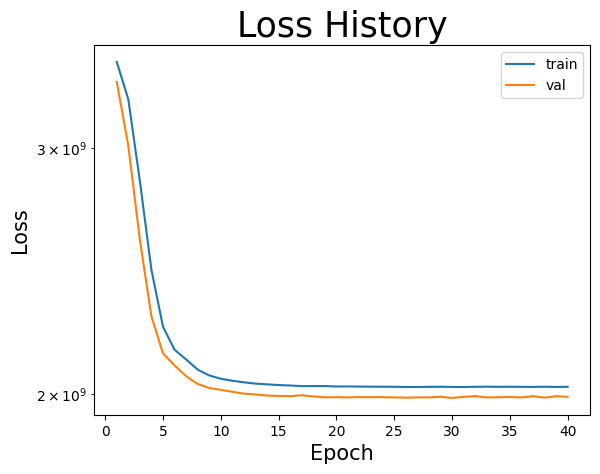

In [ ]:
history = history.history

fontsize_title = 25
fontsize_axis = 15

plt.plot(range(1, len(history['loss'])+1), history['loss'], label='train')
plt.plot(range(1, len(history['val_loss'])+1), history['val_loss'], label='val')
plt.yscale('log')
plt.title('Loss History', fontsize=fontsize_title)
plt.xlabel('Epoch', fontsize=fontsize_axis)
plt.ylabel('Loss', fontsize=fontsize_axis)
plt.legend()
plt.show()

In [ ]:
print(history.keys())

dict_keys(['loss', 'importances_loss', 'output_loss', 'importances_root_mean_squared_error', 'output_root_mean_squared_error', 'val_loss', 'val_importances_loss', 'val_output_loss', 'val_importances_root_mean_squared_error', 'val_output_root_mean_squared_error'])


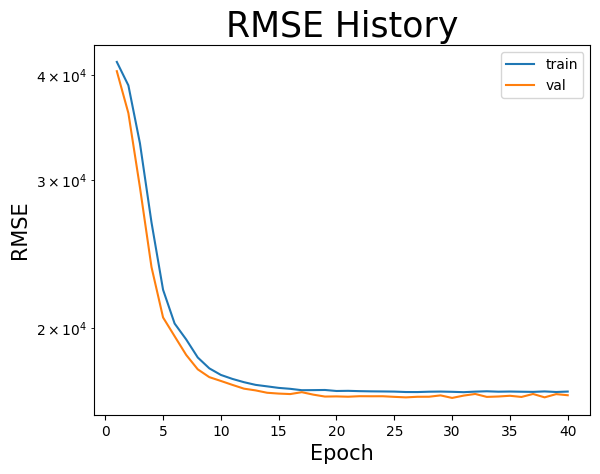

In [ ]:
plt.plot(range(1, len(history['output_root_mean_squared_error'])+1), history['output_root_mean_squared_error'], label='train')
plt.plot(range(1, len(history['val_output_root_mean_squared_error'])+1), history['val_output_root_mean_squared_error'], label='val')
plt.yscale('log')
plt.title('RMSE History', fontsize=fontsize_title)
plt.xlabel('Epoch', fontsize=fontsize_axis)
plt.ylabel('RMSE', fontsize=fontsize_axis)
plt.legend()
plt.show()

In [ ]:
#test_data = sc.transform(test_data)

test_dataset = dataframe_to_dataset(test_data, Target_FEATURE, batch_size=32)

y_pred = ft_model.predict(test_dataset)['output'].reshape(-1)

452/452 [==============================] - 5s 9ms/step


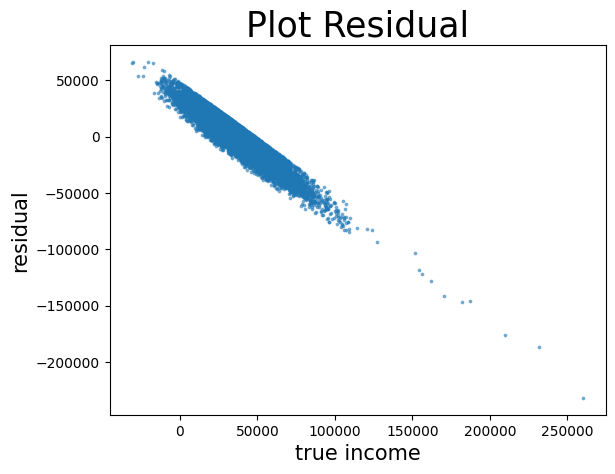

In [ ]:
#y_pred = ft_model.predict(val_dataset)['output'].reshape(-1)
y_true = test_data[Target_FEATURE].values
residual = y_pred - y_true
plt.scatter(y_true, residual, s=3, alpha=0.5)
plt.title('Plot Residual', fontsize=fontsize_title)
plt.xlabel('true income', fontsize=fontsize_axis)
plt.ylabel('residual', fontsize=fontsize_axis)
plt.show()

In [ ]:
print("R2: ", r2_score(y_true, y_pred))

R2:  -0.1414602303968946


# 2.  Implement Random Forest, XGboost and Simple MLP Neural Network + University Clustering

## Cluster the universities according to price.
## Basically , change regression into classification problem for easier computation.

In [ ]:
data = pd.read_csv('/content/with_iterative_imputation_10y_70k.csv')

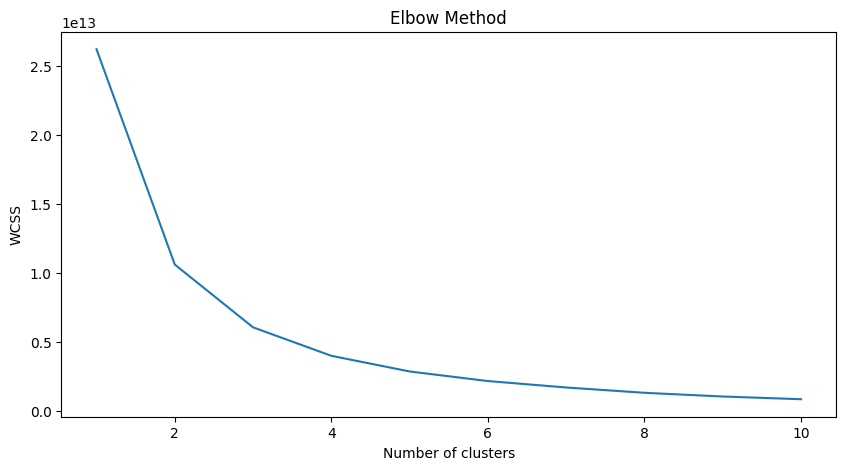

In [ ]:
# Find the appropriate number of clusters to perform KNN clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the 'MD_EARN_WNE_P10' column for clustering
earnings = data[['MD_EARN_WNE_P10']]

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(earnings)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:

# Choose 3 clusters based on the Elbow Method result
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Earnings_Cluster'] = kmeans.fit_predict(earnings)

# Check the first few rows to confirm the clustering
data[['INSTNM', 'MD_EARN_WNE_P10', 'Earnings_Cluster']].head()


,INSTNM,MD_EARN_WNE_P10,Earnings_Cluster
0,A & W Healthcare Educators,-6938.660529,2
1,A & W Healthcare Educators,12698.000011,2
2,A & W Healthcare Educators,48480.251461,0
3,A & W Healthcare Educators,23241.595777,2
4,A Better U Beauty Barber Academy,30872.890467,0


## Perform Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the features and target variable
X = data.drop(['INSTNM', 'Earnings_Cluster'], axis=1)
y = data['Earnings_Cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("Random Forest")
print("accuracy: ", accuracy)
print("classification results: ", classification_report_results)

Random Forest
accuracy:  0.9999307862679956
classification results:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      7046
           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00      4539

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448



In [ ]:
import xgboost as xgb

# Initialize the classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, enable_categorical=True)
# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("XGBoost: ")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_results)

XGBoost: 
Accuracy: 0.9988925802879292
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7046
           1       1.00      1.00      1.00      2863
           2       1.00      1.00      1.00      4539

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the target variable and non-numeric columns)
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_scaled.shape, X_test_scaled.shape


((57790, 29), (14448, 29))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

# Convert labels to categorical since we're dealing with a classification problem
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(n_clusters, activation='softmax')  # Output layer for 3 clusters
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

test_accuracy, test_precision, test_recall


Epoch 1/200
1445/1445 [==============================] - 10s 5ms/step - loss: 0.2366 - accuracy: 0.9026 - precision: 0.9158 - recall: 0.8850 - val_loss: 0.1143 - val_accuracy: 0.9500 - val_precision: 0.9500 - val_recall: 0.9500
Epoch 2/200
1445/1445 [==============================] - 7s 5ms/step - loss: 0.0834 - accuracy: 0.9654 - precision: 0.9654 - recall: 0.9654 - val_loss: 0.0715 - val_accuracy: 0.9702 - val_precision: 0.9702 - val_recall: 0.9702
Epoch 3/200
1445/1445 [==============================] - 6s 4ms/step - loss: 0.0621 - accuracy: 0.9743 - precision: 0.9743 - recall: 0.9743 - val_loss: 0.0634 - val_accuracy: 0.9737 - val_precision: 0.9737 - val_recall: 0.9737
Epoch 4/200
1445/1445 [==============================] - 7s 5ms/step - loss: 0.0509 - accuracy: 0.9791 - precision: 0.9791 - recall: 0.9791 - val_loss: 0.0654 - val_accuracy: 0.9709 - val_precision: 0.9709 - val_recall: 0.9709
Epoch 5/200
1445/1445 [==============================] - 6s 4ms/step - loss: 0.0439 - accur

(0.9824889302253723, 0.9824889302253723, 0.9824889302253723)

In [ ]:
print(model.evaluate(X_test_scaled, y_test_cat, verbose=0))

[0.09054829925298691, 0.9824889302253723, 0.9824889302253723, 0.9824889302253723]


In [ ]:
Recommender System

In [ ]:
import pandas as pd

data = pd.read_csv('clean_data_9000.csv')

data['SAT_score_range'] = pd.cut(data['SATMT75'], bins=[400, 500, 600, 700, 800], labels=['400-500', '500-600', '600-700', '700-800'])
data['ACT_score_range'] = pd.cut(data['ACTCM75'], bins=[10, 20, 25, 30, 36], labels=['10-20', '20-25', '25-30', '30-36'])

data['earnings_category'] = pd.cut(data['MD_EARN_WNE_P10'], bins=[0, 30000, 50000, 70000, 100000, float('inf')], labels=['<30K', '30-50K', '50-70K', '70-100K', '>100K'])

transactions = data[['SAT_score_range', 'ACT_score_range', 'earnings_category']].apply(lambda x: x.dropna().tolist(), axis=1)

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)  # Adjust threshold as needed
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("Frequent Itemsets:")
print(frequent_itemsets)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [ ]:
top_itemsets = frequent_itemsets.nlargest(10, 'support')
print(top_itemsets)